In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import re
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [11]:
df = pd.read_csv("dataset.csv", decimal=",")

In [34]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [14]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


In [15]:
print(df.shape)

(227, 20)


In [17]:
df=df.drop_duplicates(keep='first')
print(df.shape)

(227, 20)


In [19]:
countries_with_top_gdp = df.sort_values('GDP ($ per capita)', ascending=False)
countries_with_top_gdp[['GDP ($ per capita)', 'Country']].head(20)

,GDP ($ per capita),Country
121,55100.0,Luxembourg
154,37800.0,Norway
214,37800.0,United States
22,36000.0,Bermuda
38,35000.0,Cayman Islands
177,34600.0,San Marino
196,32700.0,Switzerland
54,31100.0,Denmark
93,30900.0,Iceland
12,30000.0,Austria


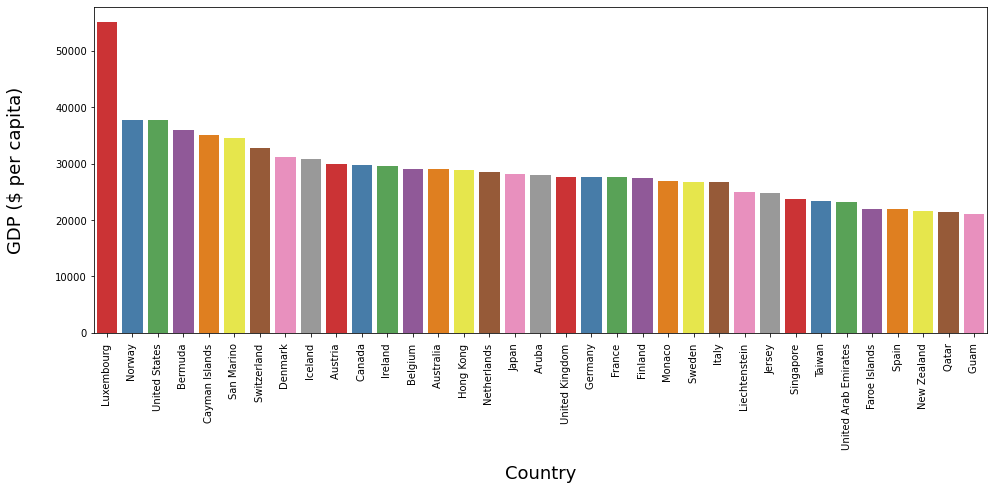

In [21]:
#Barplot for GDP vs countries for top 35 countries/values
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=countries_with_top_gdp.head(35), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
plt.xticks(rotation=90)
plt.show()

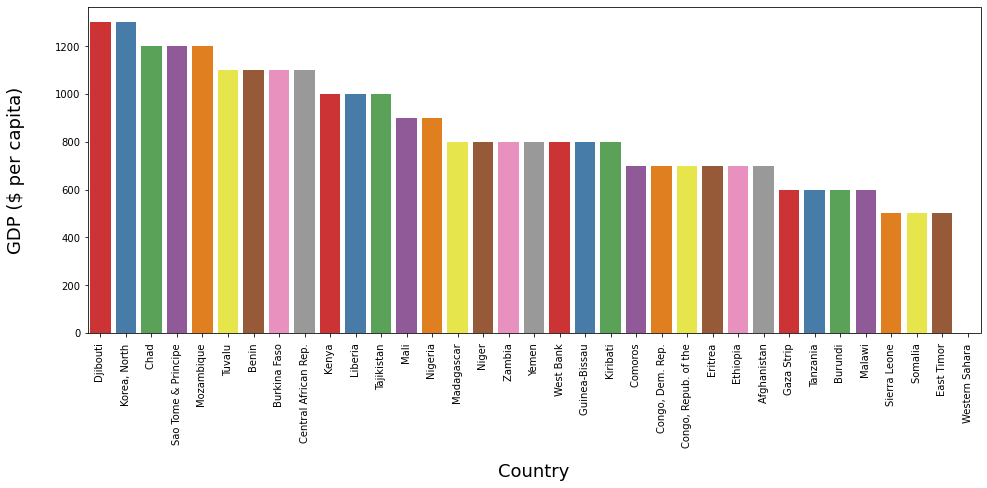

In [24]:
#Barplot for GDP vs countries for bottom 35 countries/values
fig, ax = plt.subplots(figsize=(16,6))
sns.barplot(x='Country', y='GDP ($ per capita)', data=countries_with_top_gdp.tail(35), palette='Set1')
ax.set_xlabel(ax.get_xlabel(), labelpad=15)
ax.set_ylabel(ax.get_ylabel(), labelpad=30)
ax.xaxis.label.set_fontsize(18)
ax.yaxis.label.set_fontsize(18)
plt.xticks(rotation=90)
plt.show()

In [25]:
#   1.df.isnull() : returns True where a null value exists
#   2.df.isnull().sum() != 0 : calculates the sum of all   null values and returns True where null values are present
#   3.df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False) : returns the number of null values present where the values returned by the above expression is True and arrange those values in Descending order.
#   4. pd.Series(round(total/len(df)x100,2)) : percentage of the total null values is found for the particular predictor value
#   5. The total missing values and the percentage values are concatenated.
total = df.isnull().sum()[df.isnull().sum() != 0].sort_values(ascending = False)
percent = pd.Series(round(total/len(df)*100,2))
pd.concat([total, percent], axis=1, keys=['total_missing_values', 'percent'])

,total_missing_values,percent
Climate,22,9.69
Literacy (%),18,7.93
Industry,16,7.05
Service,15,6.61
Agriculture,15,6.61
Deathrate,4,1.76
Phones (per 1000),4,1.76
Birthrate,3,1.32
Infant mortality (per 1000 births),3,1.32
Net migration,3,1.32


In [29]:
# Checking for null values
df.isnull().values.any()

True

In [30]:
# Calculating the total number of null values
df.isnull().sum().sum()

110

In [32]:
#All the regions are grouped and the median values of their GDP (per capita), Literacy and Agriculture are displayed

df.groupby('Region')[['GDP ($ per capita)', 'Literacy (%)', 'Agriculture']].median()

,GDP ($ per capita),Literacy (%),Agriculture
Region,,,
ASIA (EX. NEAR EAST),3450.0,90.60,0.1610
BALTICS,11400.0,99.80,0.0400
C.W. OF IND. STATES,3450.0,99.05,0.1980
EASTERN EUROPE,9100.0,98.60,0.0815
LATIN AMER. & CARIB,6300.0,94.05,0.0700
NEAR EAST,9250.0,83.00,0.0350
NORTHERN AFRICA,6000.0,70.00,0.1320
NORTHERN AMERICA,29800.0,97.50,0.0100
OCEANIA,5000.0,95.00,0.1505


<AxesSubplot:>

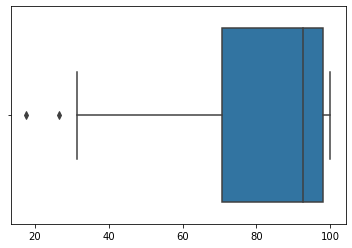

In [35]:
# 1. A box plot divides the data into five divisions namely the minimum value, first quartile, median, third quartile and the maximum value.
# 2. A box plot can tell us what the outliers (extreme values) are and can also help us identify if our data is symmetrical and how tightly grouped it is and how much skewed the data is.
sns.boxplot(np.array(df['Literacy (%)']))

<AxesSubplot:xlabel='GDP ($ per capita)'>

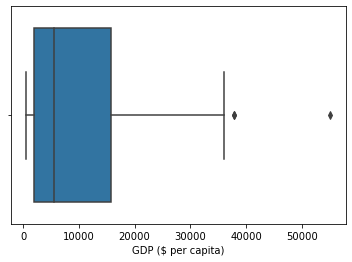

In [36]:
sns.boxplot(df['GDP ($ per capita)'])

In [37]:
# 1. Correlation between every entity is found. Correlation values range from -1 to +1. Larger the absolute value, stronger the correlation. Negative values indicate inverse correlation.

df.corr()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
Population,1.000000,0.469985,-0.028190,-0.068199,0.000011,0.023003,-0.039324,-0.043481,-0.030819,0.188251,-0.060757,-0.120606,-0.026546,-0.045090,-0.028367,0.000376,0.099333,-0.080852
Area (sq. mi.),0.469985,1.000000,-0.066917,-0.095627,0.047470,-0.007163,0.072185,0.035994,0.053403,-0.079714,-0.143916,0.138974,-0.117134,-0.066423,0.040079,-0.050640,0.121565,-0.054369
Pop. Density (per sq. mi.),-0.028190,-0.066917,1.000000,0.241690,0.178038,-0.144238,0.195773,0.097230,0.280172,-0.081015,-0.031661,0.081859,0.009064,-0.159192,-0.070045,-0.107142,-0.139803,0.248774
Coastline (coast/area ratio),-0.068199,-0.095627,0.241690,1.000000,-0.134145,-0.136577,0.049118,0.117095,0.152129,-0.120772,0.341820,-0.079494,-0.032579,-0.075765,-0.161866,-0.030250,-0.199995,0.196528
Net migration,0.000011,0.047470,0.178038,-0.134145,1.000000,-0.025015,0.382461,-0.008761,0.239601,-0.058170,-0.347968,0.225299,-0.015170,-0.066537,0.033611,-0.116719,-0.026324,0.127134
Infant mortality (per 1000 births),0.023003,-0.007163,-0.144238,-0.136577,-0.025015,1.000000,-0.600774,-0.765536,-0.672312,-0.113859,-0.062366,0.124100,-0.374406,0.845764,0.656338,0.709475,0.003322,-0.633982
GDP ($ per capita),-0.039324,0.072185,0.195773,0.049118,0.382461,-0.600774,1.000000,0.513144,0.834499,0.019768,-0.219229,0.097828,0.340791,-0.650137,-0.201661,-0.586769,-0.028926,0.550216
Literacy (%),-0.043481,0.035994,0.097230,0.117095,-0.008761,-0.765536,0.513144,1.000000,0.601935,0.105021,0.042825,-0.107563,0.392081,-0.790846,-0.393946,-0.609638,0.064733,0.494607
Phones (per 1000),-0.030819,0.053403,0.280172,0.152129,0.239601,-0.672312,0.834499,0.601935,1.000000,0.061022,-0.152420,0.029900,0.402161,-0.724614,-0.260309,-0.601739,-0.152452,0.683934
Arable (%),0.188251,-0.079714,-0.081015,-0.120772,-0.058170,-0.113859,0.019768,0.105021,0.061022,1.000000,0.094361,-0.856763,0.380031,-0.186823,0.053472,-0.034822,-0.063618,0.091126


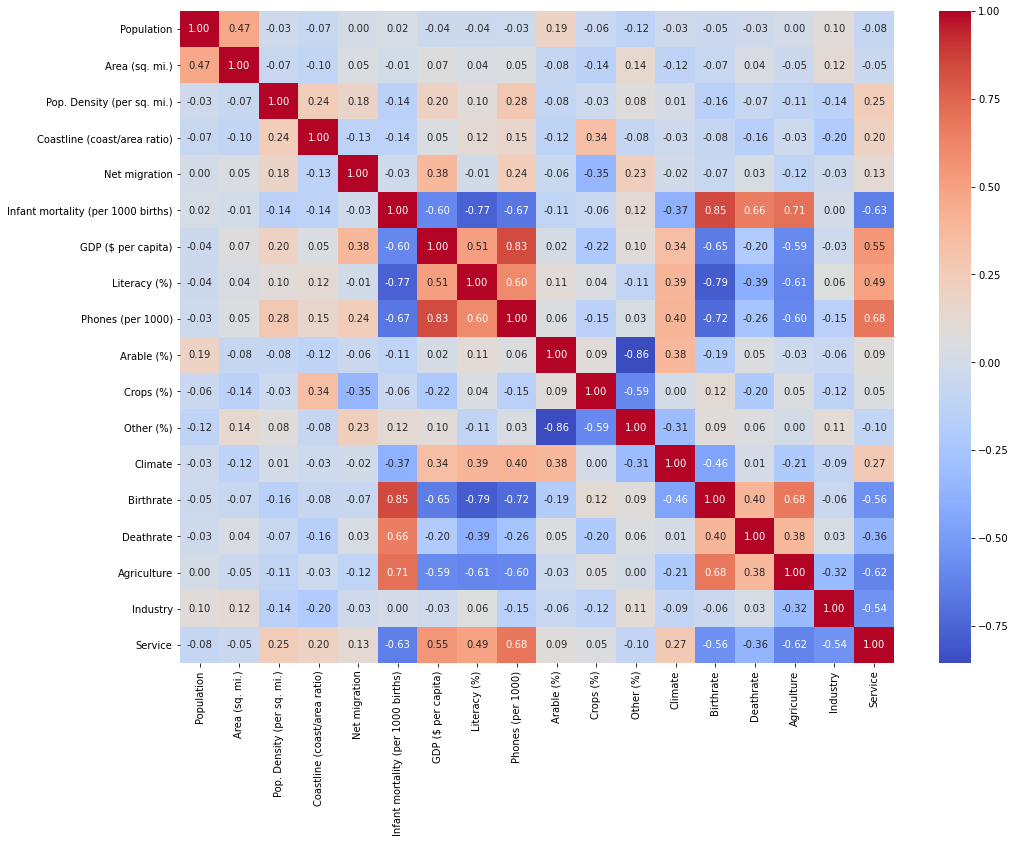

In [38]:
# 1. A heatmap is a numeric tabular data where the cells are colored depending on the values of the correlation. Higher the magnitude of correlation, darker the colour.

plt.figure(figsize=(16,12))
sns.heatmap(data=df.iloc[:,2:].corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.show()

In [39]:
# 1. Infant mortality rate(per 1000 births), Literacy, Phones, Birthrate, Agriculture, and Service have the highest absolute correlation with GDP (per capita).
# 2. These attributes are chosen to display the heatmap in order to get the correlation of the same.

x = df[['GDP ($ per capita)','Literacy (%)','Phones (per 1000)','Service','Infant mortality (per 1000 births)','Birthrate','Deathrate','Agriculture']]

<AxesSubplot:>

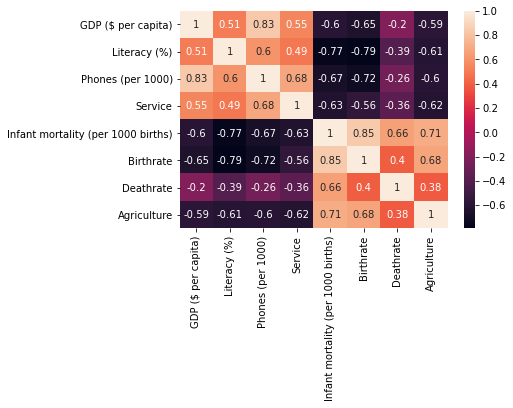

In [41]:
sns.heatmap(x.corr(), annot=True)

In [42]:
#From the heatmap it is observed that GDP(per capita) has the highest correlation with Phones(per 1000) of 0.83.

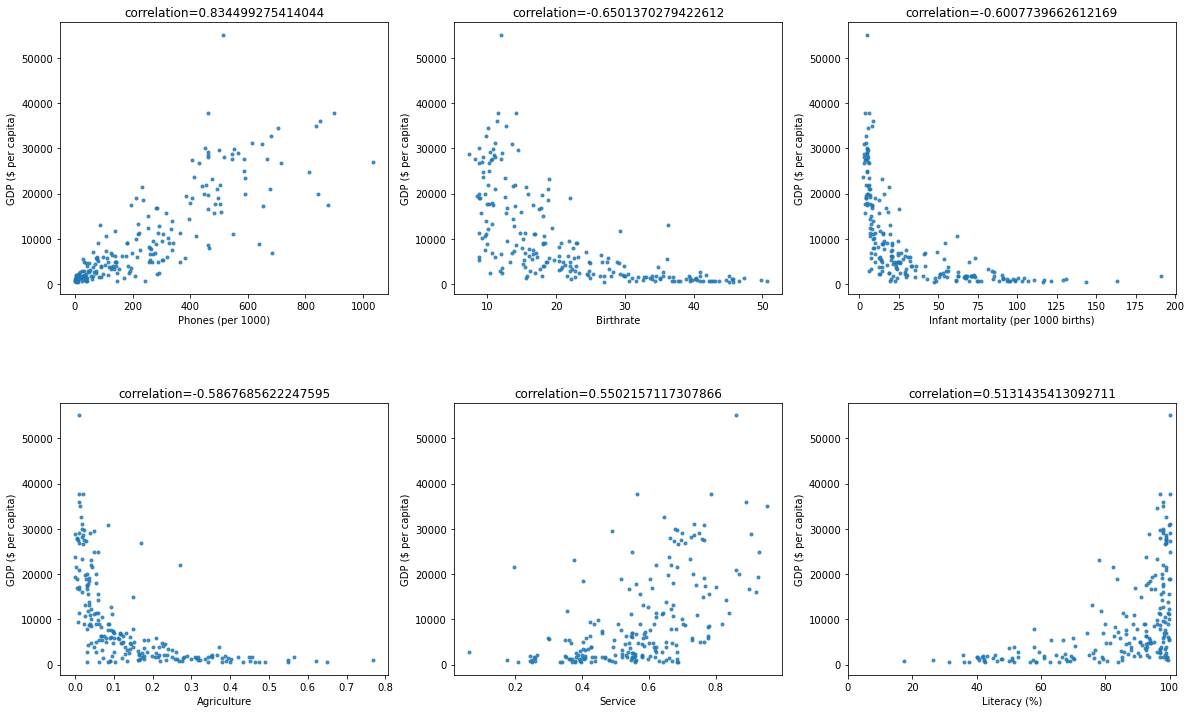

In [46]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(20,12))
plt.subplots_adjust(hspace=0.4)

corr_to_gdp = pd.Series()
for col in df.columns.values[2:]:
    if ((col!='GDP ($ per capita)')&(col!='Climate')):
        corr_to_gdp[col] = df['GDP ($ per capita)'].corr(df[col])
abs_corr_to_gdp = corr_to_gdp.abs().sort_values(ascending=False)
corr_to_gdp = corr_to_gdp.loc[abs_corr_to_gdp.index]

for i in range(2):
    for j in range(3):
        sns.regplot(x=corr_to_gdp.index.values[i*3+j], y='GDP ($ per capita)', data=df,
                   ax=axes[i,j], fit_reg=False, marker='.')
        title = 'correlation='+str(corr_to_gdp[i*3+j])
        axes[i,j].set_title(title)
axes[1,2].set_xlim(0,102)
plt.show()

In [ ]:
# In the above linear regression, we are plotting the top 9 values that have a good correlation with GDP ($ per capita). From this model, we can further infer that Phones (per 1000) and Service have a better linear regression to GDP than other predictors. coz Some features, like phones, are related to the average GDP more linearly, while others are not. For example, High birthrate usually means low GDP per capita, but average GDP in low birthrate countries can vary a lot.

#The absolute correlation values of the possible predictors for GDP ($ per capita) arranged in Descending order.

In [50]:
corr_to_gdp

Phones (per 1000)                     0.834499
Birthrate                            -0.650137
Infant mortality (per 1000 births)   -0.600774
Agriculture                          -0.586769
Service                               0.550216
Literacy (%)                          0.513144
Net migration                         0.382461
Crops (%)                            -0.219229
Deathrate                            -0.201661
Pop. Density (per sq. mi.)            0.195773
Other (%)                             0.097828
Area (sq. mi.)                        0.072185
Coastline (coast/area ratio)          0.049118
Population                           -0.039324
Industry                             -0.028926
Arable (%)                            0.019768
dtype: float64

In [ ]:

# It can be inferred from the given regplot that Phones and Service have the best linear regression plot with GDP.

# We choose the attributes GDP, Phones and Service and find the median value of them for every Region since we are doing the analysis for Region here

In [62]:
df.groupby('Region')[['GDP ($ per capita)', 'Phones (per 1000)', 'Service']].median()

,GDP ($ per capita),Phones (per 1000),Service
Region,,,
ASIA (EX. NEAR EAST),3450.0,61.50,0.4950
BALTICS,11400.0,321.40,0.6660
C.W. OF IND. STATES,3450.0,155.35,0.4595
EASTERN EUROPE,9100.0,296.05,0.5910
LATIN AMER. & CARIB,6300.0,222.85,0.6180
NEAR EAST,9250.0,211.00,0.5840
NORTHERN AFRICA,6000.0,123.60,0.4255
NORTHERN AMERICA,29800.0,683.20,0.7870
OCEANIA,5000.0,118.60,0.6440


In [63]:
x = df[['Region','GDP ($ per capita)','Phones (per 1000)','Service']]
x

,Region,GDP ($ per capita),Phones (per 1000),Service
0,ASIA (EX. NEAR EAST),700.0,3.2,0.380
1,EASTERN EUROPE,4500.0,71.2,0.579
2,NORTHERN AFRICA,6000.0,78.1,0.298
3,OCEANIA,8000.0,259.5,0.644
4,WESTERN EUROPE,19000.0,497.2,0.720
...,...,...,...,...
222,NEAR EAST,800.0,145.2,0.630
223,NORTHERN AFRICA,6000.0,123.6,0.400
224,NEAR EAST,800.0,37.2,0.393
225,SUB-SAHARAN AFRICA,800.0,8.2,0.489


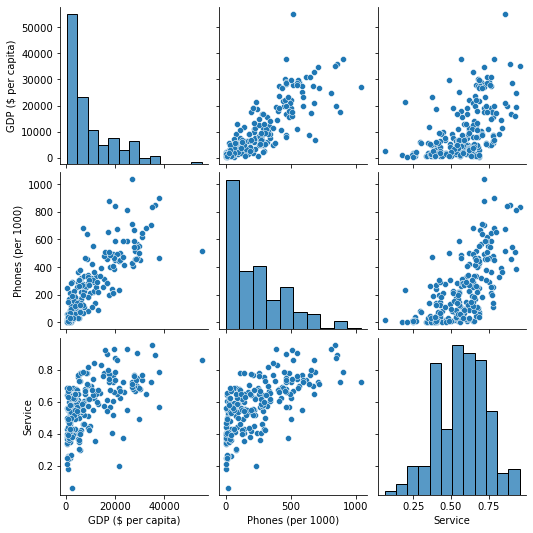

In [64]:
# We can infer that GDP and Phone (per 1000), and GDP and Service are highly correlated.

sns.pairplot(x,vars=["GDP ($ per capita)","Phones (per 1000)","Service"])

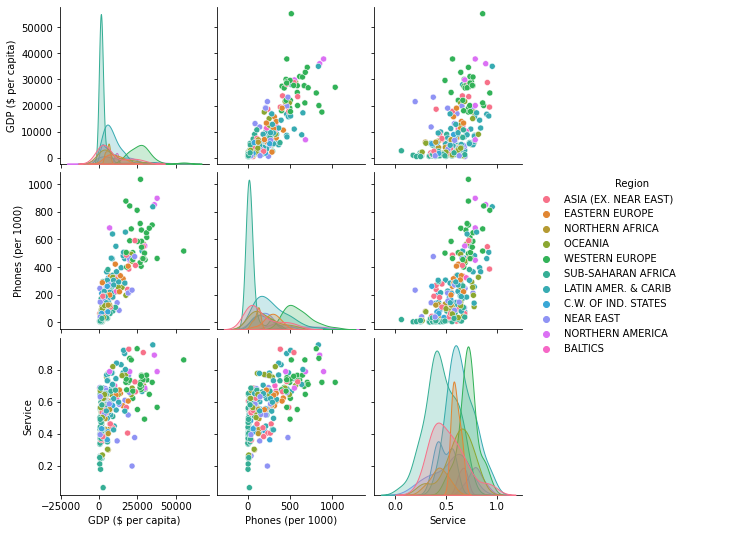

In [65]:
# The pairplot for Phones (per 1000) and Service is plotted with respect to GDP ($ per capita) for different Regions.

sns.pairplot(x,hue='Region',vars=["GDP ($ per capita)","Phones (per 1000)","Service"])

In [66]:
x.corr()

#Phones (per 1000) has the highest correlation with GDP ($ per capita). Therefore, we can use Phones (per 1000) as a predictor value for GDP ($ per capita).

,GDP ($ per capita),Phones (per 1000),Service
GDP ($ per capita),1.000000,0.832364,0.553994
Phones (per 1000),0.832364,1.000000,0.670933
Service,0.553994,0.670933,1.000000


In [69]:

df['GDP ($ per capita)']

0        700.0
1       4500.0
2       6000.0
3       8000.0
4      19000.0
        ...   
222      800.0
223     6000.0
224      800.0
225      800.0
226     1900.0
Name: GDP ($ per capita), Length: 227, dtype: float64

In [ ]:
# Getting rid of the NaNs
# In order to plot a distplot we need to get rid of the NaN values in the GDP (per capita) column.

# We can get rid of the NaN values using various methods, some of them being:

# 1. Deleting the rows where NaN values are present
# 2. Replacing the NaN values by the mean value of that column
# 3. Using the imputer function present in the sklearn library

# Here, we get rid of the NaNs present in the GDP by deleting the rows which contain those values. We can see in the output obtained above by comparing the GDP (per capita) value and the gdp_no_nan value that the NaN values are removed by deleting the row. The length of the Series is reduced by 1 i.e from 227 to 226 as GDP had only one NaN value present.

In [70]:
# Do this if () Checking for null values /n df['GDP ($ per capita)'].isnull().values.any() gives True) or else just leave it as it is 
gdp_no_nan= df['GDP ($ per capita)'][~np.isnan(df['GDP ($ per capita)'])]

In [71]:
gdp_no_nan


0        700.0
1       4500.0
2       6000.0
3       8000.0
4      19000.0
        ...   
222      800.0
223     6000.0
224      800.0
225      800.0
226     1900.0
Name: GDP ($ per capita), Length: 227, dtype: float64

In [72]:
# Checking for null values
df['GDP ($ per capita)'].isnull().values.any()

False

In [ ]:
# Distplot
# It is a combination of a histogram and a seaborn kde plot. It is used for seeing the univariate distribution.
# The distribution shown for gdp with itself in the seaborn pairplot contained NaN values.
# The distplot is similarly plotted for Phones (per 1000) and Service.

<AxesSubplot:ylabel='Density'>

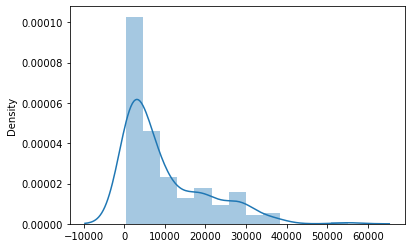

In [73]:
#checking distribution of literacy of the world
sns.distplot(np.array(gdp_no_nan))

In [ ]:
# Sometimes, deleting rows in order to get rid of the NaNs might cause some problems.
# We can resort to methods such as replacing the NaN values by zero or by the mean or the median values. Below analysis for Phones (per 1000) is done for replacing the NaN values by zero.

In [74]:
# check for null values in phone (per 1000) column
df['Phones (per 1000)'].isnull().values.any()

False

In [82]:
phones = df['Phones (per 1000)']

<AxesSubplot:ylabel='Density'>

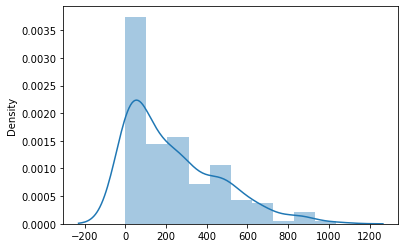

In [85]:
sns.distplot(np.array(phones))

In [86]:
# check for null values in Service column
df['Service'].isnull().values.any()

False

In [91]:
# services = df['Service']

<AxesSubplot:ylabel='Density'>

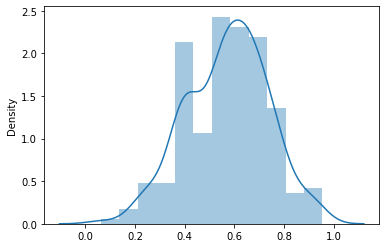

In [96]:
sns.distplot(np.array(df['Service']))

<AxesSubplot:>

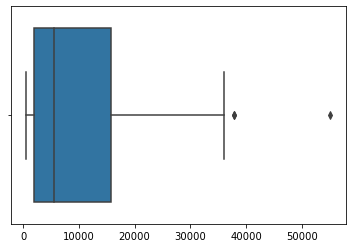

In [93]:
sns.boxplot(np.array(df['GDP ($ per capita)']))

<AxesSubplot:>

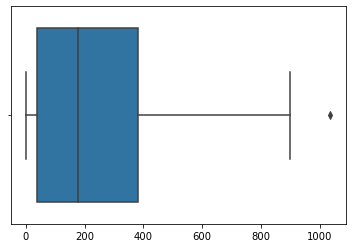

In [94]:
sns.boxplot(np.array(df['Phones (per 1000)']))

<AxesSubplot:>

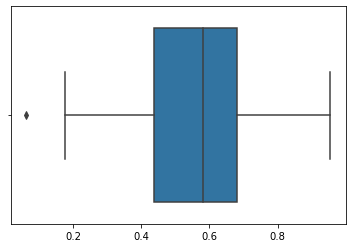

In [95]:
sns.boxplot(np.array(df['Service']))

# The box plot of Service does not have any outliers

In [ ]:
# Conclusion
# From the EDA done above, we can say that Phones (per 1000) is the best predictor for GDP because it has a correlation of 0.83 with GDP also, it's linear regression graph is much better than the graphs of the other predictors.

# Also, we can say that Missing values while doing EDA are not good. Therefore, we must learn to get rid of those. Few methods to get rid of these NaNs are highlighted above. The methods being dropping the rows containing NaN values, replacing the NaNs by zero or by replacing them by the mean or the median. Out of these methods, it is recommended to not drop the rows as it reduces the quality of the model.

# Filling the NaNs by zero, mean or the median values is recommended and the most commonly used method. Between mean and median, median is preferred because mean contains outliers